# Analysing Discounts Part3

## 1. Imports of libraries and data

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
o_ol_pro_m_original = pd.read_csv("o_ol_pro_m.csv")

In [5]:
o_ol_pro_m_original["created_date"] = pd.to_datetime(o_ol_pro_m_original["created_date"])

In [6]:
o_ol_pro_m_original["date"] = pd.to_datetime(o_ol_pro_m_original["date"])

In [7]:
#o_ol_pro_m_original.info()

In [8]:
o_ol_pro_m = o_ol_pro_m_original.copy()

In [9]:
o_ol_pro_m["price_total"] = o_ol_pro_m.price * o_ol_pro_m.product_quantity

## 2. Looking at time

The board of directors have the opion that the revenue has been decreasing in the last quarter and that the number of products sold did go up. Can we verify this statement with the data we have? 

In [10]:
#what is the latest order? -- 2018-03-14 13:58:36
o_ol_pro_m.loc[o_ol_pro_m.created_date == o_ol_pro_m["created_date"].max(), ['order_id', 'created_date']]

,order_id,created_date
53230,527112,2018-03-14 12:03:52


So the latest order was in Q1 2018 - for this quarter we do not have all information yet. 
The quarter to which the executives are thus referring is Q4 2017. 
I'll extract the data for Q4-2017 and verify:
* what is the revenue?
* what is total number of products sold? 

In [11]:
o_ol_pro_m_last_quarter = o_ol_pro_m.loc[(o_ol_pro_m["created_date"].dt.strftime("%Y") == "2017") & (o_ol_pro_m["created_date"].dt.quarter == 4) , :].copy()

o_ol_pro_m_last_quarter.unit_price_total.sum().round(2), o_ol_pro_m_last_quarter.product_quantity.sum(), 

(3037096.34, 20251)

In Q4 2017 we had sales of 3,037,096.34 and a total number of products sold of 20,251.

* 2017 - Q4: (3,037,096.34, 20,251)
* 2017 - Q3: (1,366,908.1,  10,429)
* 2017 - Q2: (  845,881.28,   6,725)
* 2017 - Q1: (  961,560.19,  10,013)
* 2016 - Q4: (0.0, 0)
* 2016 - Q3: (0.0, 0)

And looking forward:

* 2018 - Q1: (1,605,758.49, 12,593) 

Q1 is not yet finished and will be less than then 3 million of Q4 2017.
But it passed already 1 Million and is thus higher than all other quarters before.


In [12]:
bins_quarter = []

In [13]:
#df_plot= pd.pivot_table(df_test, columns='VehicleType', index=['hour'], aggfunc='sum', values='Minutes_Idling').plot(kind='bar')

## 3. Looking at different discounts (in € and in %)

In [14]:
bins = [-300, 0, 25, 50, 75, 100, 150, 300, 2000]

In [15]:
o_ol_pro_m["binned_discount_in_EUR"] = pd.cut(o_ol_pro_m.discount, bins)
o_ol_pro_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                53231 non-null  int64         
 1   product_quantity        53231 non-null  int64         
 2   sku                     53231 non-null  object        
 3   unit_price              53231 non-null  float64       
 4   date                    53231 non-null  datetime64[ns]
 5   unit_price_total        53231 non-null  float64       
 6   name                    53231 non-null  object        
 7   desc                    53231 non-null  object        
 8   price                   53231 non-null  float64       
 9   in_stock                53231 non-null  int64         
 10  type                    53220 non-null  object        
 11  brand                   53195 non-null  object        
 12  discount                53231 non-null  float6

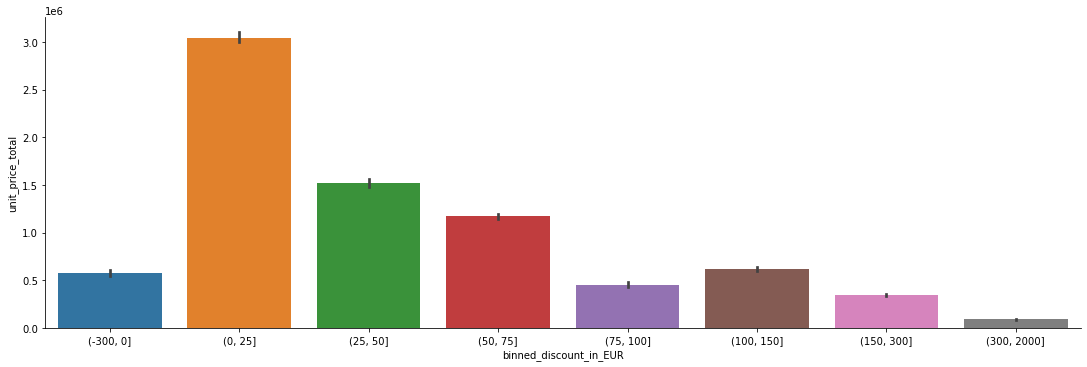

In [16]:
sns.catplot(data=o_ol_pro_m, 
            kind="bar",
            x="binned_discount_in_EUR", 
            y="unit_price_total",
            aspect = 3,
            estimator = sum
            );

## 4. Looking at broad categories'

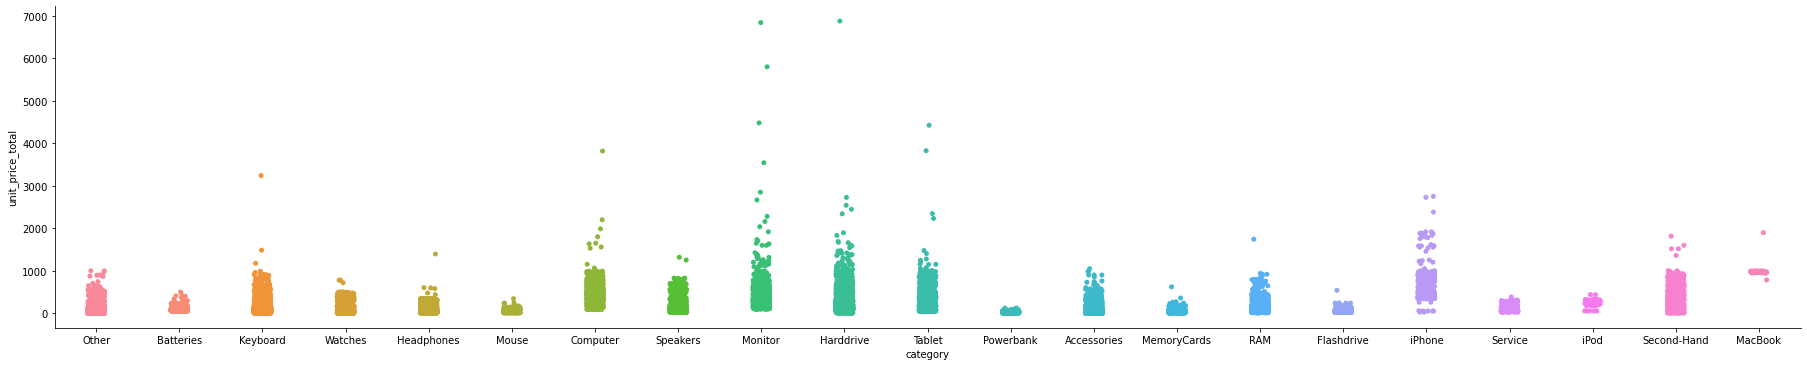

In [17]:
sns.catplot(data=o_ol_pro_m, 
            x="category", 
            y="unit_price_total",
            aspect = 5
            );

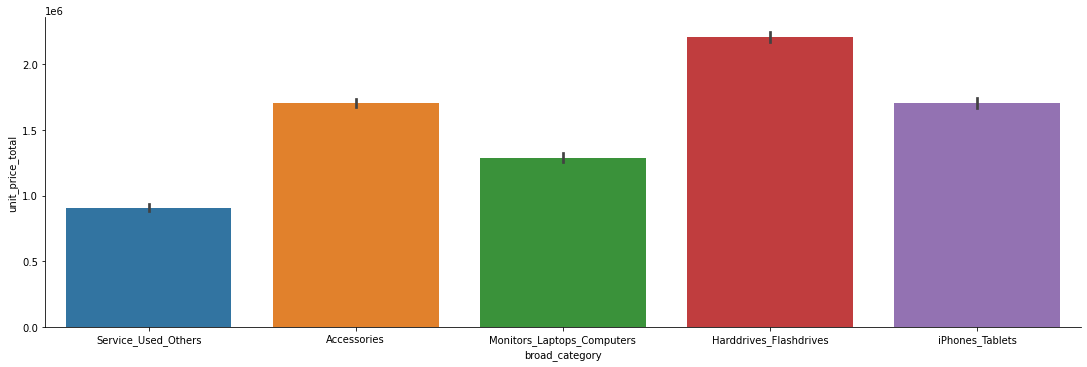

In [18]:
sns.catplot(data=o_ol_pro_m, 
            kind="bar",
            x="broad_category", 
            y="unit_price_total",
            aspect = 3,
            estimator = sum
            );

In [66]:
sns.set(font_scale=1.4)

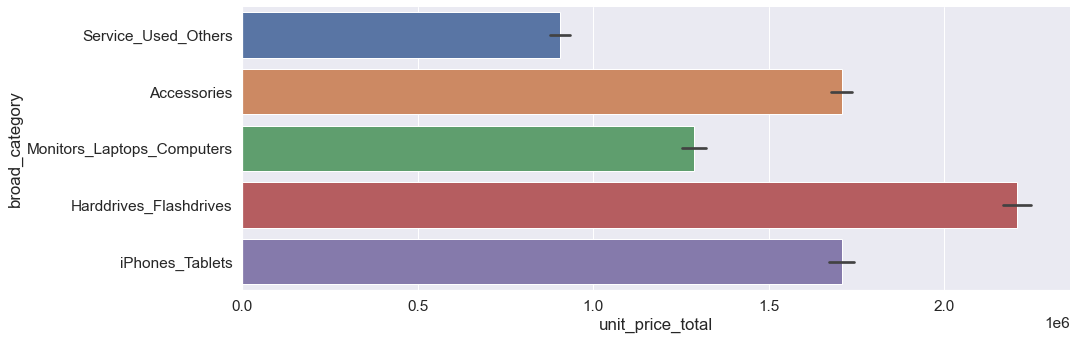

In [67]:
sns.catplot(data=o_ol_pro_m, 
            kind="bar",
            x="unit_price_total", 
            y="broad_category",
            aspect = 3,
            estimator = sum,
            col_order = ["Harddrives_Flashdrives", "Accessories", "iPhones_Tablets", "Monitors_Laptops_Computers", "Service_Used_Others"]
            );

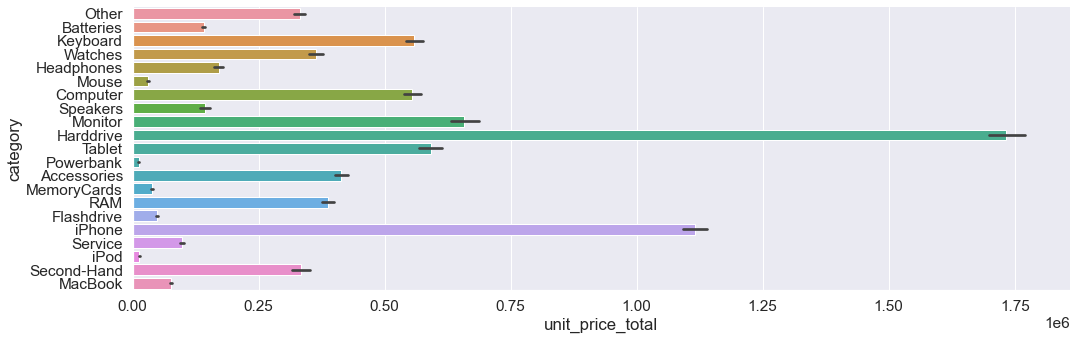

In [68]:
sns.catplot(data=o_ol_pro_m, 
            kind="bar",
            x="unit_price_total", 
            y="category",
            aspect = 3,
            estimator = sum
            );

In [ ]:
#take a subset for each broad category

In [73]:
df_broad_cat = o_ol_pro_m.loc[o_ol_pro_m.broad_category == "Harddrives_Flashdrives",:]

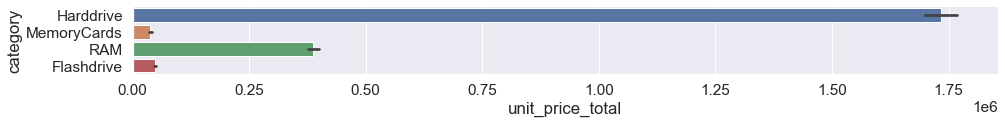

In [79]:
sns.catplot(data=df_broad_cat, 
            kind="bar",
            x="unit_price_total", 
            y="category",
            aspect = 7,
            height = 2,
            estimator = sum
            );

In [94]:
df_broad_cat = o_ol_pro_m.loc[o_ol_pro_m.broad_category == "Accessories",:]

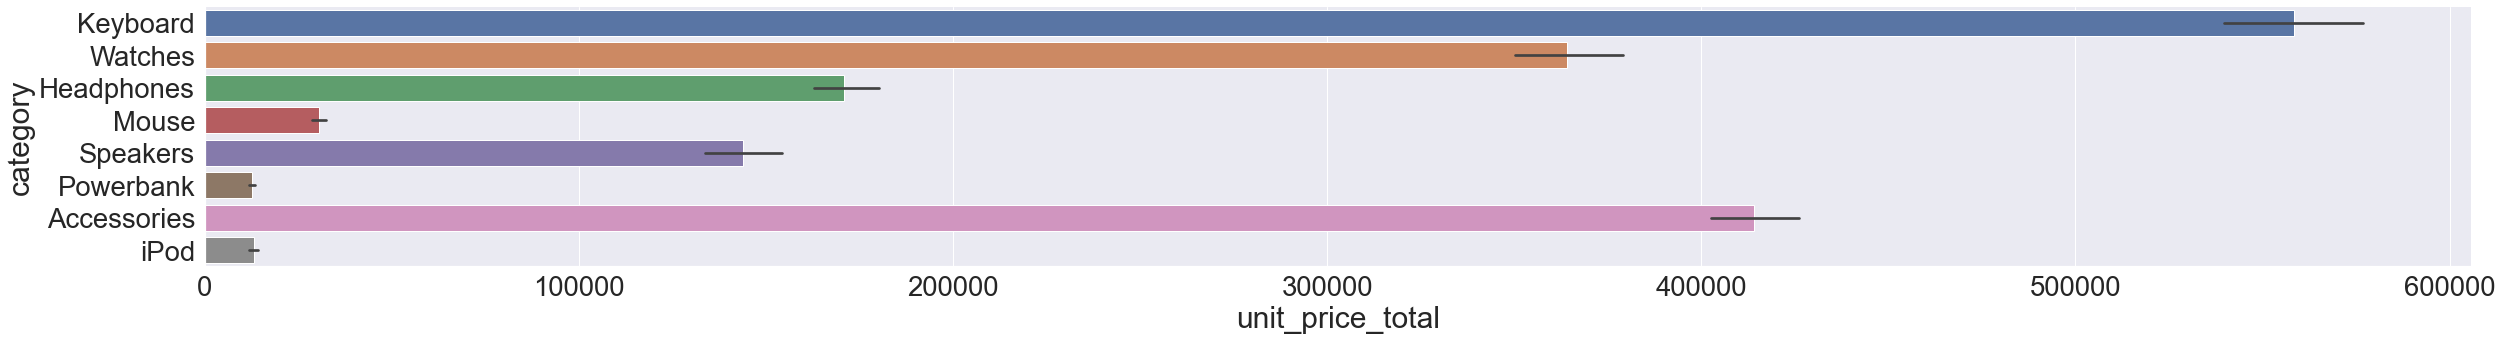

In [97]:
sns.set(font_scale=2.5)
sns.catplot(data=df_broad_cat, 
            kind="bar",
            x="unit_price_total", 
            y="category",
            aspect = 7,
            height = 5,
            estimator = sum
            );

In [91]:
df_broad_cat = o_ol_pro_m.loc[o_ol_pro_m.broad_category == "iPhones_Tablets",:]

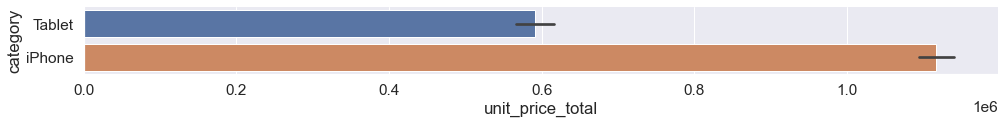

In [92]:
sns.catplot(data=df_broad_cat, 
            kind="bar",
            x="unit_price_total", 
            y="category",
            aspect = 7,
            height = 2,
            estimator = sum
            );

In [89]:
df_broad_cat = o_ol_pro_m.loc[o_ol_pro_m.broad_category == "Monitors_Laptops_Computers",:]

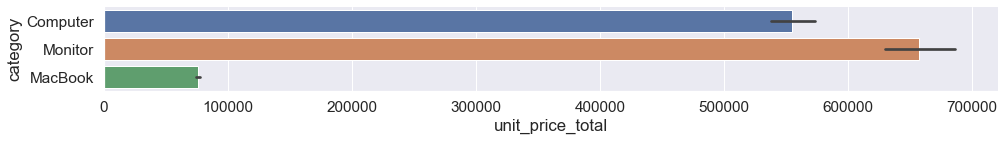

In [90]:
sns.catplot(data=df_broad_cat, 
            kind="bar",
            x="unit_price_total", 
            y="category",
            aspect = 7,
            height = 2,
            estimator = sum
            );

In [ ]:
df_broad_cat = o_ol_pro_m.loc[o_ol_pro_m.broad_category == "Harddrives_Flashdrives",:]

In [ ]:
sns.catplot(data=df_broad_cat, 
            kind="bar",
            x="unit_price_total", 
            y="category",
            aspect = 3,
            estimator = sum
            );

### Aggressive Discounts

In [19]:
aggr_bins = [0, 20, 50, 2000]
o_ol_pro_m["aggressive_discount_perc"] = pd.cut(o_ol_pro_m["%_discount"], aggr_bins)
o_ol_pro_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  53231 non-null  int64         
 1   product_quantity          53231 non-null  int64         
 2   sku                       53231 non-null  object        
 3   unit_price                53231 non-null  float64       
 4   date                      53231 non-null  datetime64[ns]
 5   unit_price_total          53231 non-null  float64       
 6   name                      53231 non-null  object        
 7   desc                      53231 non-null  object        
 8   price                     53231 non-null  float64       
 9   in_stock                  53231 non-null  int64         
 10  type                      53220 non-null  object        
 11  brand                     53195 non-null  object        
 12  discount          

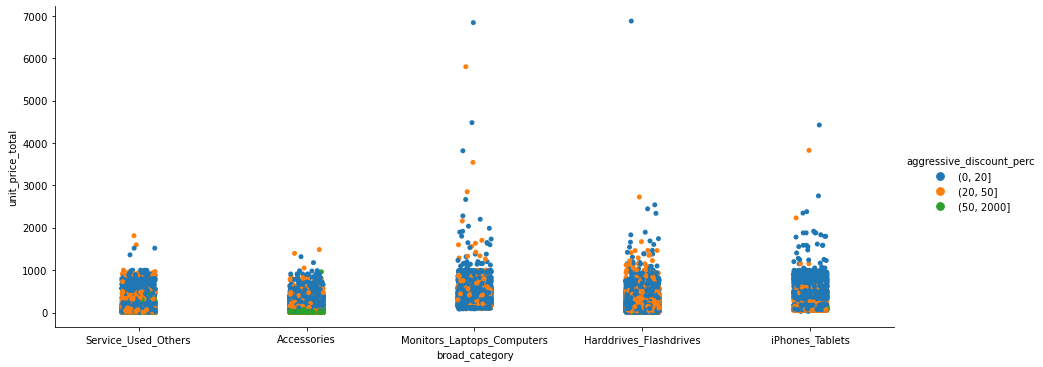

In [20]:
sns.catplot(data=o_ol_pro_m, 
            x="broad_category", 
            y="unit_price_total",
            hue="aggressive_discount_perc",
            aspect = 2.5,
            );

In [21]:
o_ol_pro_m.head()

,order_id,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,in_stock,...,%_discount,total_discount,created_date,total_paid,state,category,broad_category,price_total,binned_discount_in_EUR,aggressive_discount_perc
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,...,22.134776,13.50,2017-01-01 01:51:47,51.48,Completed,Other,Service_Used_Others,60.99,"(0, 25]","(20, 50]"
1,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,...,17.254902,3.96,2017-01-01 01:57:34,18.99,Completed,Other,Service_Used_Others,22.95,"(0, 25]","(0, 20]"
2,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,...,18.887640,16.81,2017-01-01 02:02:38,72.19,Completed,Batteries,Service_Used_Others,89.00,"(0, 25]","(0, 20]"
3,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,...,20.898818,16.09,2017-01-01 02:30:08,65.89,Completed,Keyboard,Accessories,76.99,"(0, 25]","(20, 50]"
4,299561,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,0,...,52.501750,157.50,2017-01-01 02:39:47,154.48,Completed,Watches,Accessories,299.99,"(150, 300]","(50, 2000]"


In [22]:
discounted_accessories_with_high_percentage = o_ol_pro_m.loc[(o_ol_pro_m["%_discount"] >= 50) & (o_ol_pro_m.broad_category == "Accessories"), :]

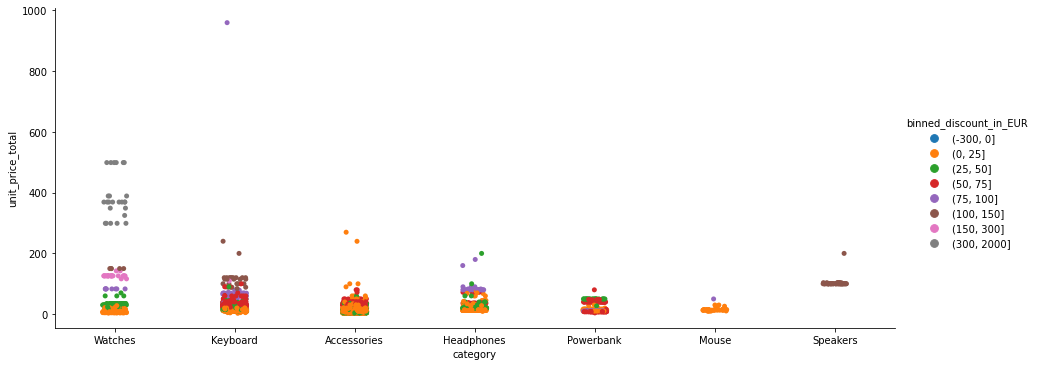

In [23]:
sns.catplot(data=discounted_accessories_with_high_percentage, 
            x="category", 
            y="unit_price_total",
            hue="binned_discount_in_EUR",
            aspect = 2.5,
            );



There are agressive discounts above 50%, which also have a high value discount of above 75 EUR / or 100 Eur. 
They are mainly in selling watches, speakers and keyboards.

### crazy analysis - discount percentage and total discount per broad category --- No big findings

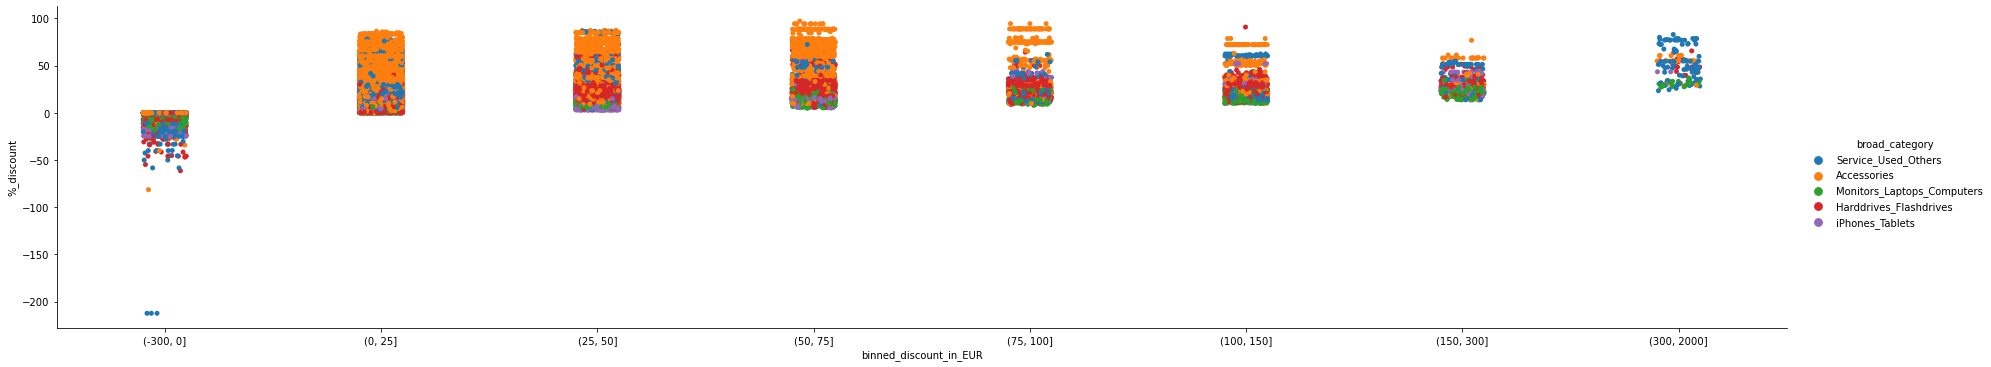

In [24]:
sns.catplot(data=o_ol_pro_m, 
            x="binned_discount_in_EUR", 
            y="%_discount",
            aspect = 5,
            hue = "broad_category"
            );

## 5. Analysis of categories with an overview of total_revenue and total_discount

In [25]:
#category vs revenue

#total_revenue = o_ol_pro_m.resample("M", on="created_date").unit_price_total.mean()
#total_revenue.plot(kind='bar');


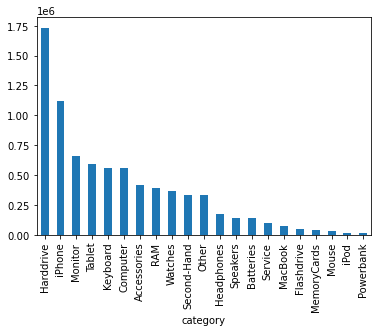

In [26]:
#category vs revenue
df_revenue = o_ol_pro_m.groupby("category").unit_price_total.sum().sort_values(ascending=False)
df_revenue.plot(kind='bar');

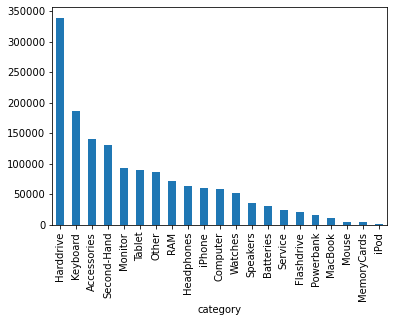

In [27]:
df_discount = o_ol_pro_m.groupby("category").total_discount.sum().sort_values(ascending=False)
df_discount.plot(kind='bar');

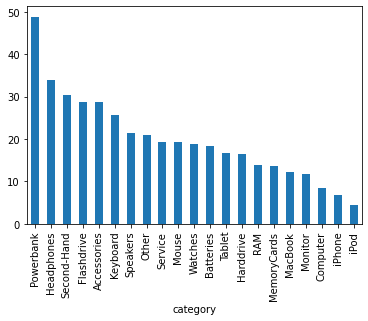

In [28]:
df_discount_percent = o_ol_pro_m.groupby("category")["%_discount"].mean().sort_values(ascending=False)
df_discount_percent.plot(kind='bar');

### Classification

In [113]:
# calculating %_discount for each category
# why are there differences?
# what categories have more discount in percent? and also in absolute terms ("discount_total")?

categories_discount = o_ol_pro_m.groupby(["broad_category", "category"]).agg({"price": "mean", "price_total": "sum", "unit_price" : "mean", "total_discount" : ["mean", "sum"], "unit_price_total" : ["mean", "sum"], "product_quantity" : "sum", "%_discount" : ["mean", "sum"], "discount" : ["sum", "mean"]}).copy()
 

#categories_discount = o_ol_pro_m.groupby("broad_category").agg({"price": "mean", "price_total": "sum", "unit_price" : "mean", "total_discount" : ["mean", "sum"], "unit_price_total" : ["mean", "sum"], "product_quantity" : "sum", "%_discount" : ["mean", "sum"], "discount" : ["sum", "mean"]}).copy()
    
    

In [114]:
#divided by price
categories_discount["%_discount_total_price"] = categories_discount[("total_discount", "sum")] / categories_discount[("price_total", "sum")]  * 100
#the quantity will be missing


In [31]:
#show
#categories_discount


#### Three Classifications of Broad_Categories
**1. More revenue (absolut and mean) and more discount --> this is also a nice category, at least we have more revenue**
* Accessories

**2. More revenue and less than average discount (21%) --> this is a category we will be in**
* Harddrive/Flashdrive
* iPhones/Tablets

**3. Less revenue and more discount --> this one is not so desirable**
* Service_Used_Other


**4. Less revenue (compared to other broad categories) and less discount** --> maybe irrelevant
* Monitors_Laptops_Computers






In [115]:
#sort by revenue_absolute
categories_discount.nlargest(21, ("unit_price_total", "sum"))

price price_total  unit_price  \
                                               mean         sum        mean   
broad_category             category                                           
Harddrives_Flashdrives     Harddrive     212.018082  2072755.44  177.757513   
iPhones_Tablets            iPhone        603.559323  1176603.98  572.239291   
Monitors_Laptops_Computers Monitor       442.104708   750058.38  388.565702   
iPhones_Tablets            Tablet        372.164259   681239.56  323.869469   
Accessories                Keyboard       92.944067   745343.51   69.635475   
Monitors_Laptops_Computers Computer      493.358616   614404.96  445.667175   
Accessories                Accessories    52.925113   554198.56   39.871362   
Harddrives_Flashdrives     RAM           129.799493   460252.42  109.024238   
Accessories                Watches       178.741016   416369.73  156.360674   
Service_Used_Others        Second-Hand   519.704920   465627.50  373.733550   
                           Other          52.377228   417637.69   41.549120   
Accessories                Headphones    124.580786   234890.73   91.483032   
                           Speakers      211.170955   180330.36  166.388076   
Service_Used_Others        Batteries     112.957906   172854.31   92.431091   
                           Service        95.165842   123444.99   76.204567   
Monitors_Laptops_Computers MacBook      1105.504416    86229.43  971.421688   
Harddrives_Flashdrives     Flashdrive     72.605047    68449.30   50.995198   
                           MemoryCards    67.900450    43224.38   60.674730   
Accessories                Mouse          64.378863    35402.44   55.453565   
                           iPod          228.918276    13739.07  217.984138   
                           Powerbank      57.648438    29370.12   25.609687   

                                       total_discount             \
                                                 mean        sum   
broad_category             category                                
Harddrives_Flashdrives     Harddrive        40.475739  339308.12   
iPhones_Tablets            iPhone           31.817705   60167.28   
Monitors_Laptops_Computers Monitor          62.532747   93111.26   
iPhones_Tablets            Tablet           51.694559   89586.67   
Accessories                Keyboard         25.619393  187021.57   
Monitors_Laptops_Computers Computer         48.848311   59301.85   
Accessories                Accessories      14.462315  140038.60   
Harddrives_Flashdrives     RAM              23.119726   72503.46   
Accessories                Watches          22.921458   52352.61   
Service_Used_Others        Second-Hand     149.782078  131209.10   
                           Other            11.592069   86047.93   
Accessories                Headphones       35.651421   63958.65   
                           Speakers         46.490803   36495.28   
Service_Used_Others        Batteries        21.391262   31359.59   
                           Service          20.204101   24729.82   
Monitors_Laptops_Computers MacBook         136.121688   10481.37   
Harddrives_Flashdrives     Flashdrive       23.813605   20479.70   
                           MemoryCards       8.685701    4829.25   
Accessories                Mouse             9.429981    4894.16   
                           iPod             11.327586     657.00   
                           Powerbank        34.769146   16689.19   

                                       unit_price_total              \
                                                   mean         sum   
broad_category             category                                   
Harddrives_Flashdrives     Harddrive         206.781262  1733447.32   
iPhones_Tablets            iPhone            590.394870  1116436.70   
Monitors_Laptops_Computers Monitor           441.200215   656947.12   
iPhones_Tablets            Tablet            341.403860   591652.89   
Accessories        

In [112]:
categories_discount.unit_price_total.mean()

mean    2.524502e+02
sum     1.563441e+06
dtype: float64

In [34]:
#categories_discount["%_discount_total_price"].mean() # mean percentage of the categories
o_ol_pro_m.total_discount.sum() / o_ol_pro_m.price_total.sum() * 100

16.325762918522866

#### Three Classifications of Categories:
**1. More revenue (absolut and mean) and more discount --> this is also a nice category, at least we have more revenue**
* Keyboard
* Accessories
* Second-Hand


**2. More revenue and less than average discount (21%) --> this is a category we will be in**
* Harddrive
* iPhone
* Monitor
* Tablet
* Computer
* RAM
* Watches


**3. Less revenue and more discount --> this one is not so desirable**
* Speakers
* Batteries
* Other
* Headphones
* Flashdrive
* Powerbank
* Service


----- New Idea: take 16% ---- (because we calculated the discount that we are offering to the customer (totaldiscount_sum / price_total.sum *100)

**2. More revenue and <= average discount (16%) --> this is a category we will be in**
* Harddrive
* iPhone
* Monitor
* Tablet
* Computer
* RAM
* Watches


For Harddrive/Flashdrive we want to see how much money we are making: 2.2 Million (unit_price_total.sum) 
and then compare the absolute discounts: 430.000  --> 16% 

    2,207,561.01 € Revenue (unit_price_total.sum) 
       437120.53 € Discounts (total_discount.sum)
           16.5 % Discount


In [35]:
#sort by revenue_mean

### Table of categories and revenue

In [36]:
o_ol_pro_m_copy2 = o_ol_pro_m.copy() #copy

#o_ol_pro_m_copy2["year"] = o_ol_pro_m_copy2["date"].dt.year

#top_20_2017 = (
#                    o_ol_pro_m_copy2
#                    .groupby(["year", "sku"], as_index=False)
#                    ["product_quantity"]
#                    .sum()
#                    .sort_values(by=["year", "product_quantity"], ascending=False)
#                    .groupby("year").head(20)
#                    )
#top_20_2017_names = top_20_2017.merge(products_c, 
#                                                  how="left", 
#                                                  on="sku")
#(
#sns.catplot(kind="bar", 
#            data=categories_discount, 
#            x=("unit_price_total", "sum"),
#            x="%_discount_total_price",
#            y="category",  
#            color="dodgerblue",
#            height=10,
#            aspect=3,
#            sharey=False)
#    
#    .figure.suptitle("Revenue per Subcategory")
#    .figure.subplots_adjust(top=.92)
#)


Sai:
    price 500 EUR
    20% discount
    new price sold at 400 EUR (unit price)
    
    discount from the lower price is higher.
    100/400 --> 25%
    
    100/500 --> 20%
    
    yaaaaaaaaaaayyyyyyyyyyyy
    
    PARTY YAAAAAAAAYYYYYY
    
    

## 6. binned discounts revisited

In [37]:
o_ol_pro_m_copy1 = o_ol_pro_m.copy()
bins = [1, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 400, 500, 1000]
o_ol_pro_m_copy1["binned_discount_in_EUR"] = pd.cut(o_ol_pro_m_copy1.discount, bins)


In [38]:
sns.set(font_scale=1.25)


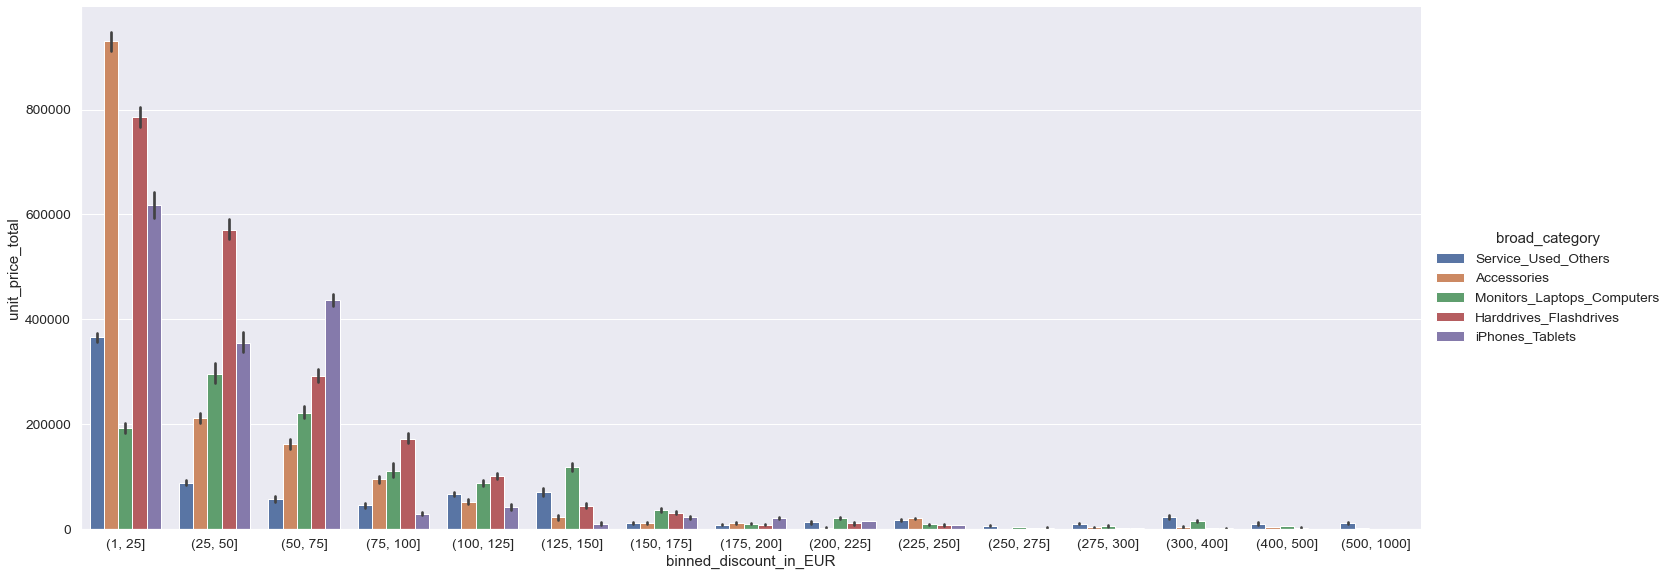

In [39]:
sns.catplot(kind="bar",
            data=o_ol_pro_m_copy1, 
            x="binned_discount_in_EUR",
            y="unit_price_total",
            hue="broad_category",
            aspect=2.5,
            height=8,
            estimator=sum);


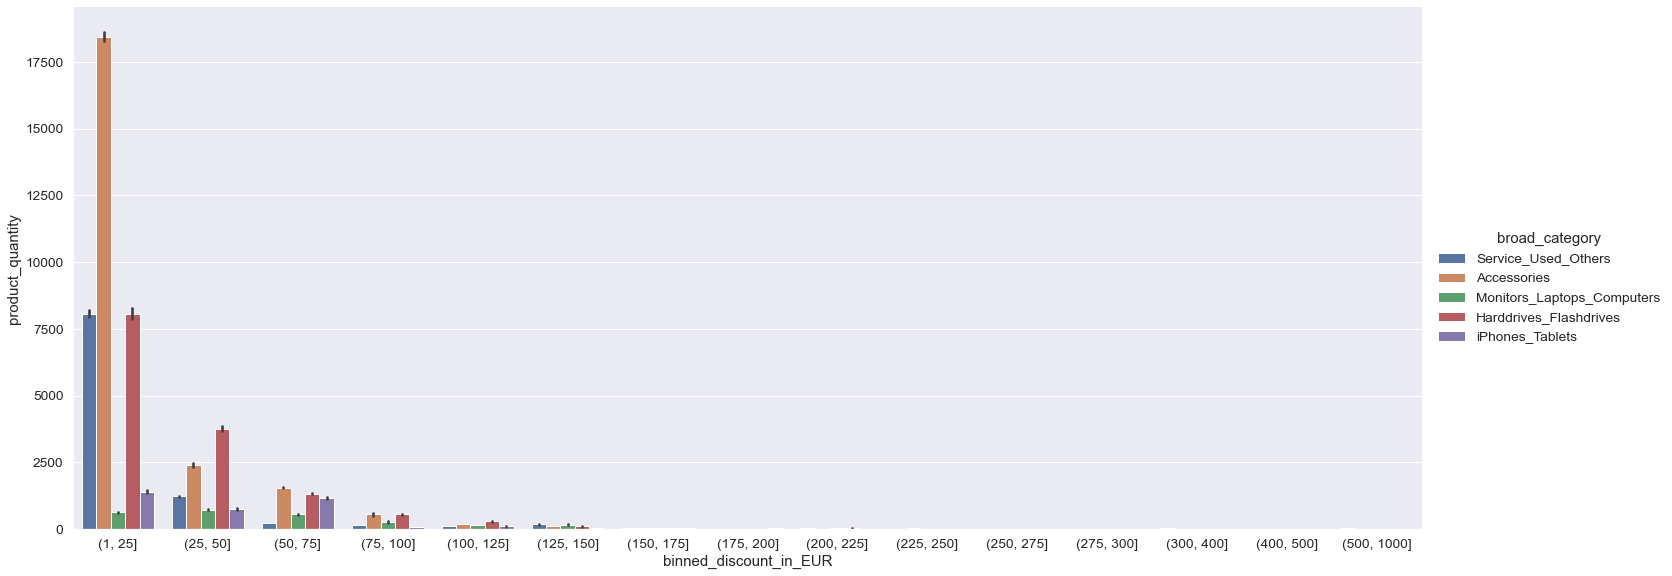

In [40]:
sns.catplot(kind="bar",
            data=o_ol_pro_m_copy1, 
            x="binned_discount_in_EUR",
            y="product_quantity",
            hue="broad_category",
            aspect=2.5,
            height=8,
            estimator=sum);

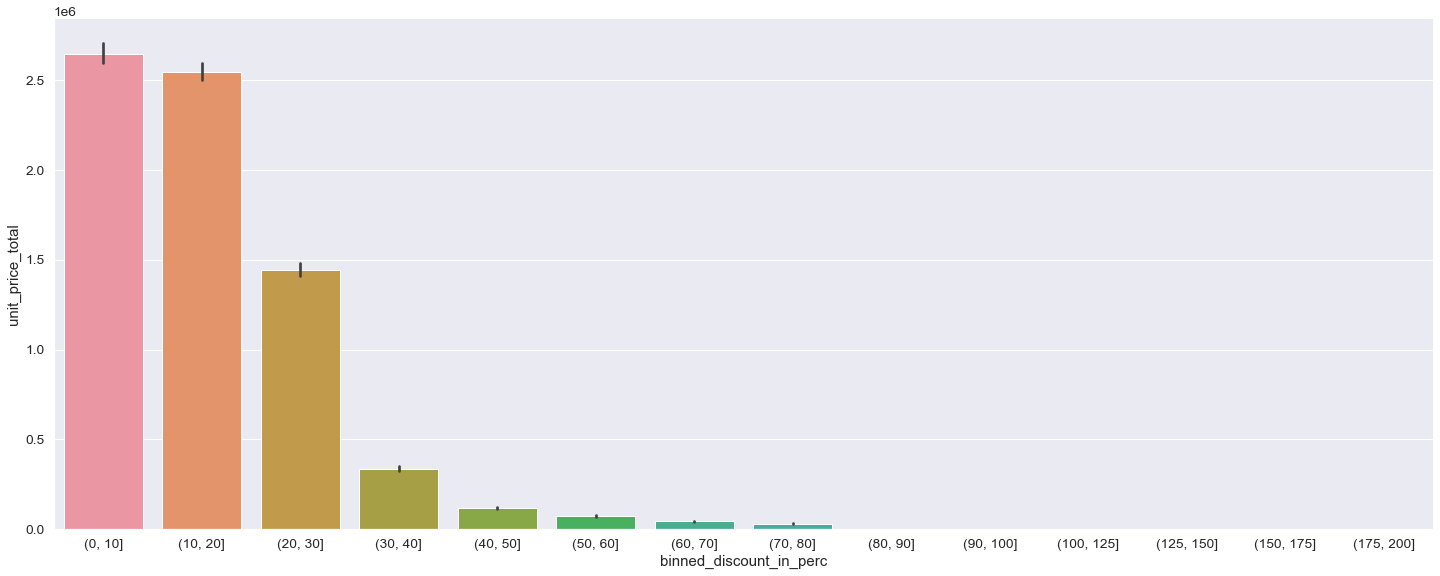

In [41]:
perc_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200]
o_ol_pro_m_copy1["binned_discount_in_perc"] = pd.cut(o_ol_pro_m_copy1["%_discount"], perc_bins)
sns.catplot(kind="bar",
            data=o_ol_pro_m_copy1, 
            x="binned_discount_in_perc",
            y="unit_price_total",
            aspect=2.5,
            height=8,
            estimator=sum);

## 7. second cluster analysis: keyboards, Accessories...


In [42]:
total_revenue_day = o_ol_pro_m.resample("D", on="created_date").unit_price_total.sum().reset_index()

In [43]:
total_discount_day = o_ol_pro_m.resample("D", on="created_date").total_discount.sum().reset_index()

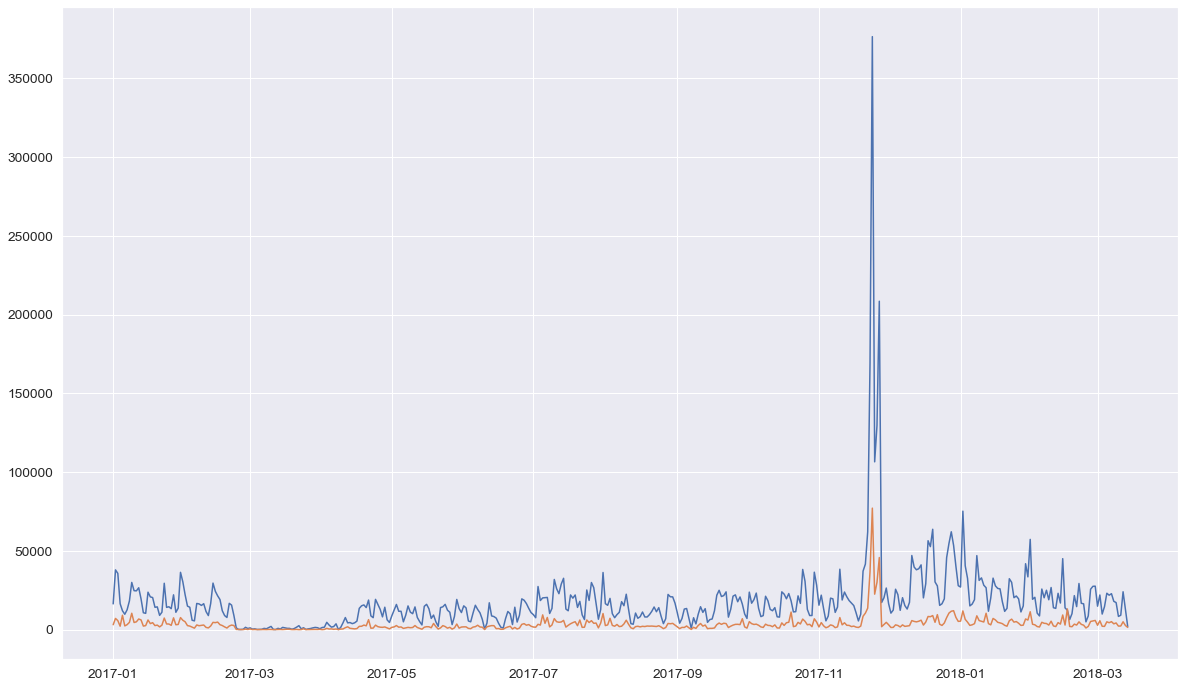

In [44]:
plt.figure(figsize=(20,12))
plt.plot(total_revenue_day["created_date"], total_revenue_day["unit_price_total"]);
plt.plot(total_discount_day["created_date"], total_discount_day["total_discount"]);

### Keyboards

In [45]:
keyboard = o_ol_pro_m.loc[o_ol_pro_m.category == "Keyboard", :]

In [46]:
o_ol_pro_m.category

0              Other
1              Other
2          Batteries
3           Keyboard
4            Watches
            ...     
53226    Accessories
53227    Accessories
53228    Accessories
53229    Accessories
53230    Accessories
Name: category, Length: 53231, dtype: object

In [47]:
total_revenue_day_keyb = keyboard.resample("D", on="created_date").unit_price_total.sum().reset_index()

In [48]:
total_discount_day_keyb = keyboard.resample("D", on="created_date").total_discount.sum().reset_index()

In [49]:
total_discount_day_keyb.head()

,created_date,total_discount
0,2017-01-01,831.91
1,2017-01-02,1871.51
2,2017-01-03,1943.01
3,2017-01-04,350.92
4,2017-01-05,7477.67


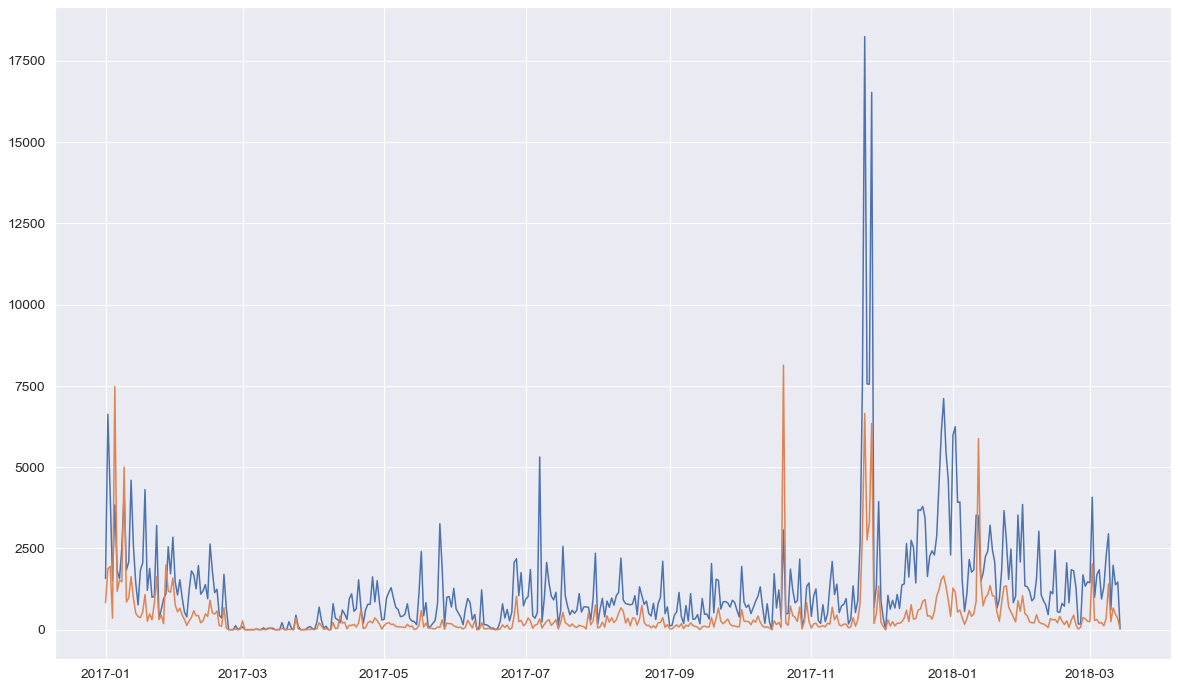

In [50]:
plt.figure(figsize=(20,12))
plt.plot(total_revenue_day_keyb["created_date"], total_revenue_day_keyb["unit_price_total"]);
plt.plot(total_discount_day_keyb["created_date"], total_discount_day_keyb["total_discount"]);

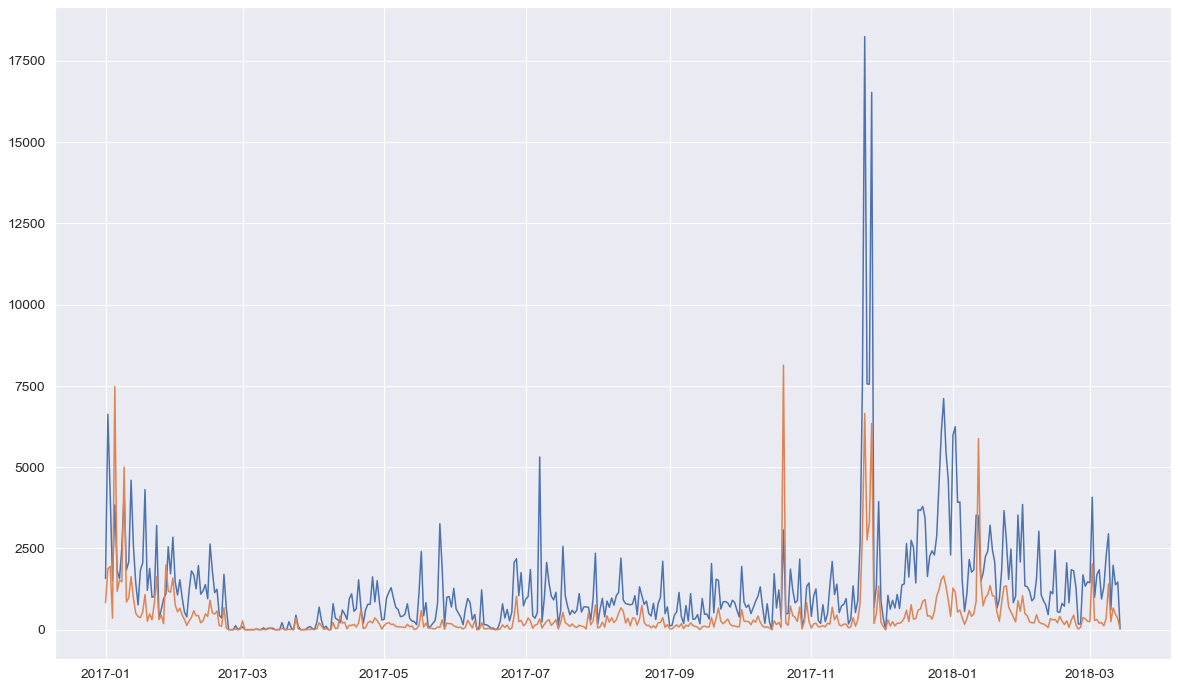

In [51]:
plt.figure(figsize=(20,12))
plt.plot(total_revenue_day_keyb["created_date"], total_revenue_day_keyb["unit_price_total"]);
plt.plot(total_discount_day_keyb["created_date"], total_discount_day_keyb["total_discount"]);

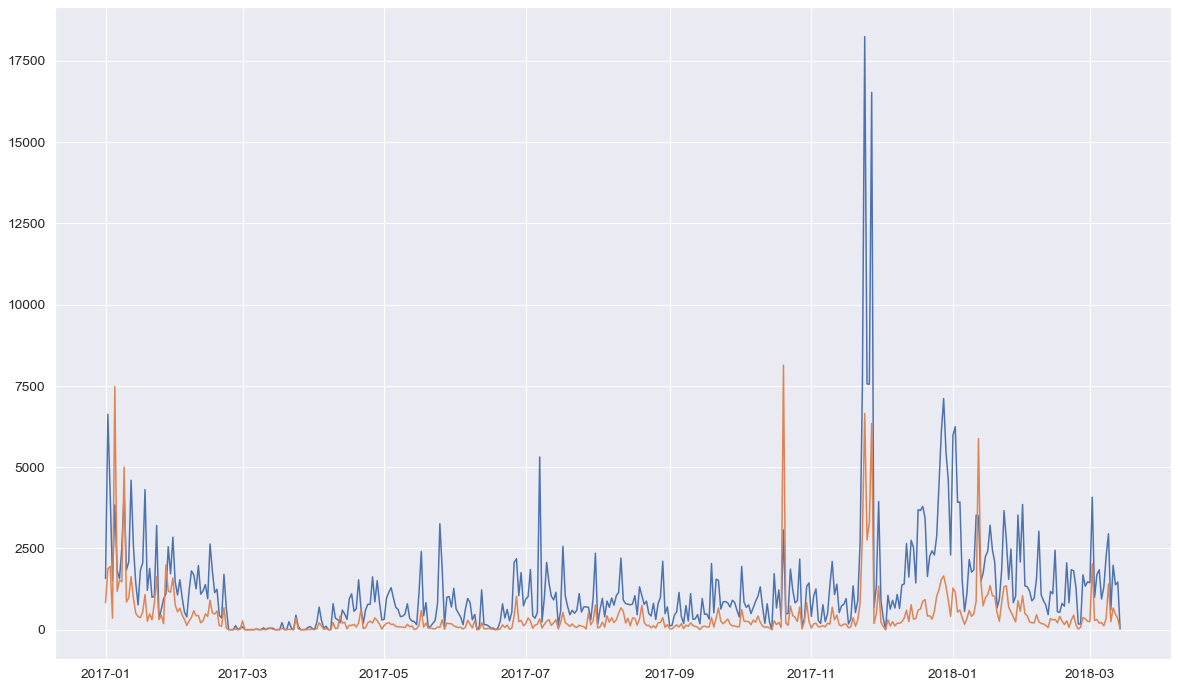

In [52]:
plt.figure(figsize=(20,12))
plt.plot(total_revenue_day_keyb["created_date"], total_revenue_day_keyb["unit_price_total"]);
plt.plot(total_discount_day_keyb["created_date"], total_discount_day_keyb["total_discount"]);

In [53]:
#total_revenue_day_keyb = total_revenue_day_keyb.drop("created_date", axis=1)
#total_discount_day_keyb = total_discount_day_keyb.drop("created_date", axis=1)

In [54]:
#trying out something on correlation
#from scipy.stats import pearsonr

#corr, _ = pearsonr(total_revenue_day_keyb.to_list(), total_discount_day_keyb.to_list())
#print('Pearsons correlation: %.3f' % corr)

#gave up - can't make it work :( 

### iPhone


In [104]:
iPhone = o_ol_pro_m.loc[o_ol_pro_m.category == "iPhone", :]
total_revenue_day_iPhone = iPhone.resample("M", on="created_date").unit_price_total.mean().reset_index()
total_discount_day_iPhone = iPhone.resample("M", on="created_date").total_discount.mean().reset_index()

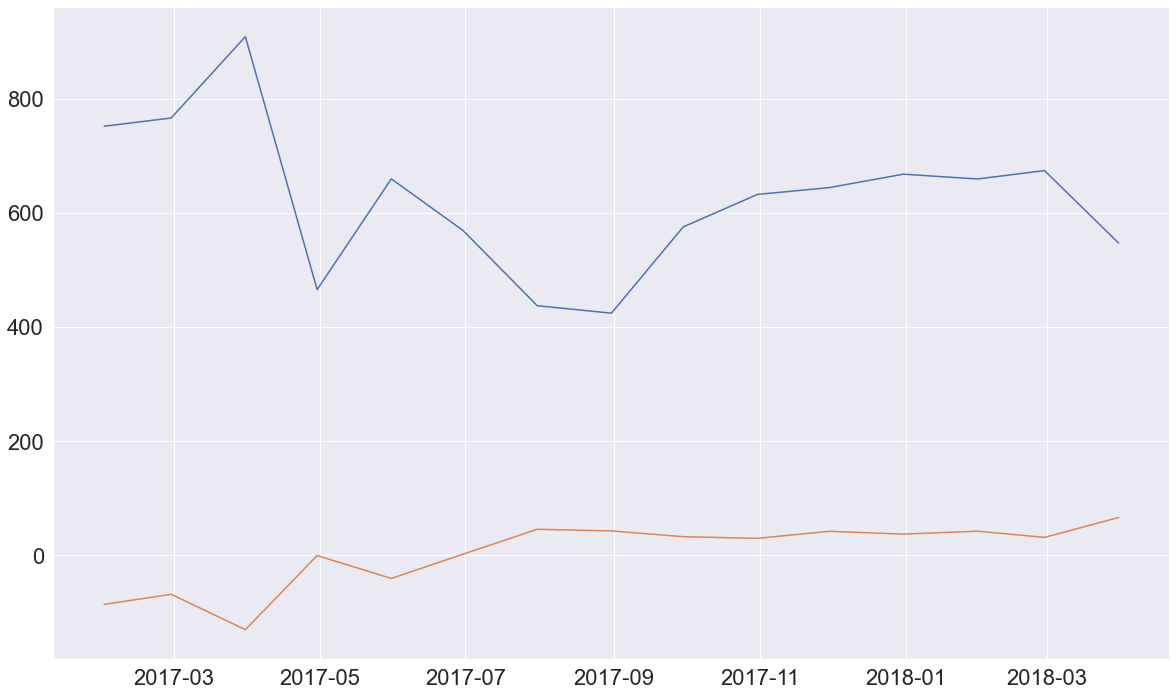

In [106]:
sns.set(font_scale=2)
plt.figure(figsize=(20,12))
plt.plot(total_revenue_day_iPhone["created_date"], total_revenue_day_iPhone["unit_price_total"]);
plt.plot(total_discount_day_iPhone["created_date"], total_discount_day_iPhone["total_discount"]);

### Accessories (category - not broad_category)

In [55]:
accessories = o_ol_pro_m.loc[o_ol_pro_m.category == "Accessories", :]

In [56]:
total_revenue_day_accessories = accessories.resample("W", on="created_date").unit_price_total.mean().reset_index()

In [57]:
total_discount_day_accessories = accessories.resample("W", on="created_date").total_discount.mean().reset_index()

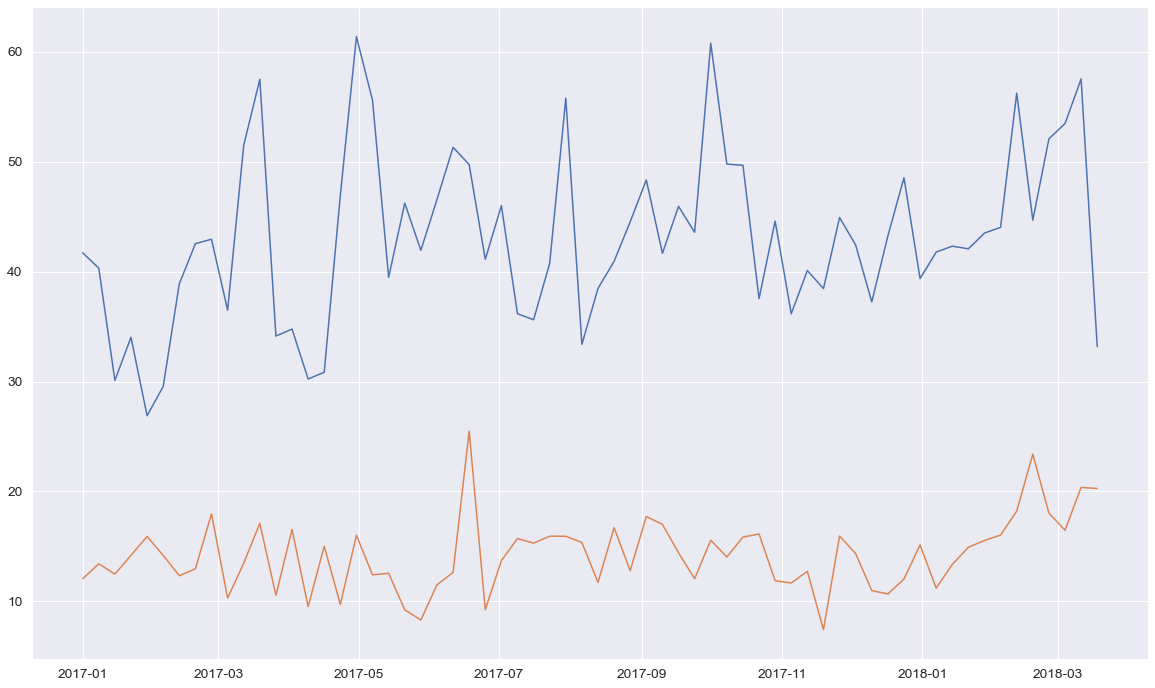

In [58]:
plt.figure(figsize=(20,12))
plt.plot(total_revenue_day_accessories["created_date"], total_revenue_day_accessories["unit_price_total"]);
plt.plot(total_discount_day_accessories["created_date"], total_discount_day_accessories["total_discount"]);

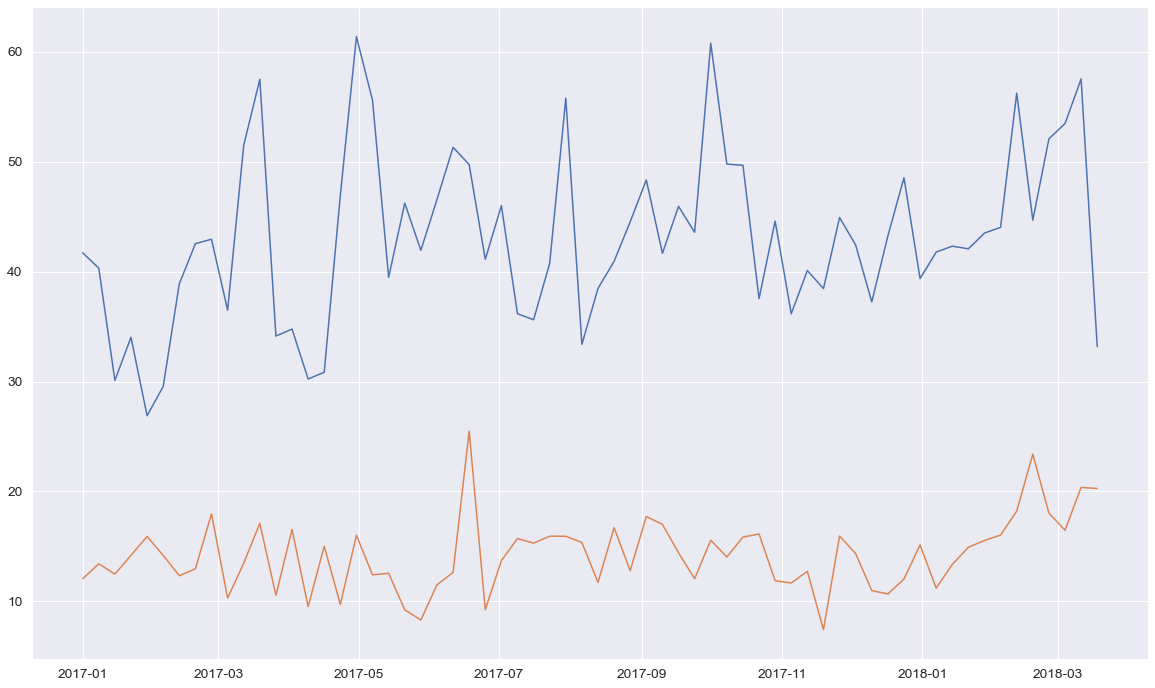

In [59]:
plt.figure(figsize=(20,12))
plt.plot(total_revenue_day_accessories["created_date"], total_revenue_day_accessories["unit_price_total"]);
plt.plot(total_discount_day_accessories["created_date"], total_discount_day_accessories["total_discount"]);

### Second-Hand